# 📊 Sprint 3: İkincil Analizler ve Görselleştirme Taslağı

Bu notebook, maaş analizi projesinin Sprint 3'sini kapsar ve aşağıdaki ikincil analizleri içerir:

## 🎯 İkincil Analiz Hedefleri

1. **Şirket Lokasyonu × Çalışma Şekli Etkileşimi** - Two-way ANOVA
2. **Saat Bazlı Anket Katılımı ve Geliştirici Profilleri** - Zaman analizi
3. **Teknoloji Stack ve ROI Analizi** - Teknoloji karlılığı
4. **Kariyer Progression Detaylı Analizi** - Kariyer geçişleri

## 📈 Görselleştirme Hedefleri

- **Temel Analiz Görselleri** (5+ adet)
- **İkincil Analiz Görselleri** (15+ adet)
- **Tutarlı Renk Paleti** (Viridis)
- **Yayın Kalitesinde PNG** (300 DPI)

---

**Hazırlayan:** Erdem Gunal
**Tarih:** 2024-08-24
**Veri Seti:** cleaned_data.csv (2,969 satır × 81 sütun)
**Sprint:** 3 - İkincil Analizler ve Görselleştirme Taslağı

## 📚 Gerekli Kütüphaneler ve Veri Yükleme

In [2]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = ['DejaVu Sans']

print("✅ Kütüphaneler başarıyla yüklendi!")

✅ Kütüphaneler başarıyla yüklendi!


In [3]:
# Çalışma dizinini ayarla
import os
os.chdir("/Users/erdemgunal/Desktop/salary_analysis_project")

# Temizlenmiş veriyi yükle
df = pd.read_csv('data/cleaned_data.csv')

print(f"📊 Veri seti yüklendi: {df.shape[0]} satır, {df.shape[1]} sütun")
print(f"💰 Maaş aralığı: {df['ortalama_maas'].min():.1f} - {df['ortalama_maas'].max():.1f} bin TL")
print(f"📈 Ortalama maaş: {df['ortalama_maas'].mean():.2f} bin TL")
print(f"📊 Medyan maaş: {df['ortalama_maas'].median():.2f} bin TL")

📊 Veri seti yüklendi: 2969 satır, 81 sütun
💰 Maaş aralığı: 5.0 - 305.0 bin TL
📈 Ortalama maaş: 100.46 bin TL
📊 Medyan maaş: 85.50 bin TL


## 🔍 1. Şirket Lokasyonu × Çalışma Şekli Etkileşimi (Two-way ANOVA)

In [4]:
# Gelişmiş analiz modülünü import et
from src.advanced_analysis import AdvancedAnalyzer

# AdvancedAnalyzer örneği oluştur
advanced_analyzer = AdvancedAnalyzer()
advanced_analyzer.df = df  # Veriyi zaten yükledik

# Etkileşim analizini çalıştır
interaction_result = advanced_analyzer.interaction_analysis()

print("=== ŞİRKET LOKASYONU × ÇALIŞMA ŞEKLİ ETKİLEŞİMİ ===")
print(f"Test Türü: {interaction_result.get('test_type', 'N/A')}")
print(f"\nAna Etkiler:")
print(f"  Çalışma Şekli: F={interaction_result.get('work_type_effect', {}).get('f_statistic', 0):.3f}, p={interaction_result.get('work_type_effect', {}).get('p_value', 1):.4f}")
print(f"  Şirket Lokasyonu: F={interaction_result.get('location_effect', {}).get('f_statistic', 0):.3f}, p={interaction_result.get('location_effect', {}).get('p_value', 1):.4f}")
print(f"  Etkileşim: F={interaction_result.get('interaction_effect', {}).get('f_statistic', 0):.3f}, p={interaction_result.get('interaction_effect', {}).get('p_value', 1):.4f}")
print(f"\nYorum: {interaction_result.get('interpretation', 'N/A')}")

2025-08-24 15:24:02,159 - INFO - Şirket lokasyonu × çalışma şekli etkileşimi analiz ediliyor...
2025-08-24 15:24:02,175 - INFO - Etkileşim analizi tamamlandı. Work type p: 0.0000, Location p: 0.0000, Interaction p: 0.0000


=== ŞİRKET LOKASYONU × ÇALIŞMA ŞEKLİ ETKİLEŞİMİ ===
Test Türü: Two-way ANOVA (Interaction)

Ana Etkiler:
  Çalışma Şekli: F=40.719, p=0.0000
  Şirket Lokasyonu: F=121.587, p=0.0000
  Etkileşim: F=49.207, p=0.0000

Yorum: Çalışma şekli maaş üzerinde anlamlı etki yaratıyor; Şirket lokasyonu maaş üzerinde anlamlı etki yaratıyor; Çalışma şekli ve lokasyon arasında anlamlı etkileşim var


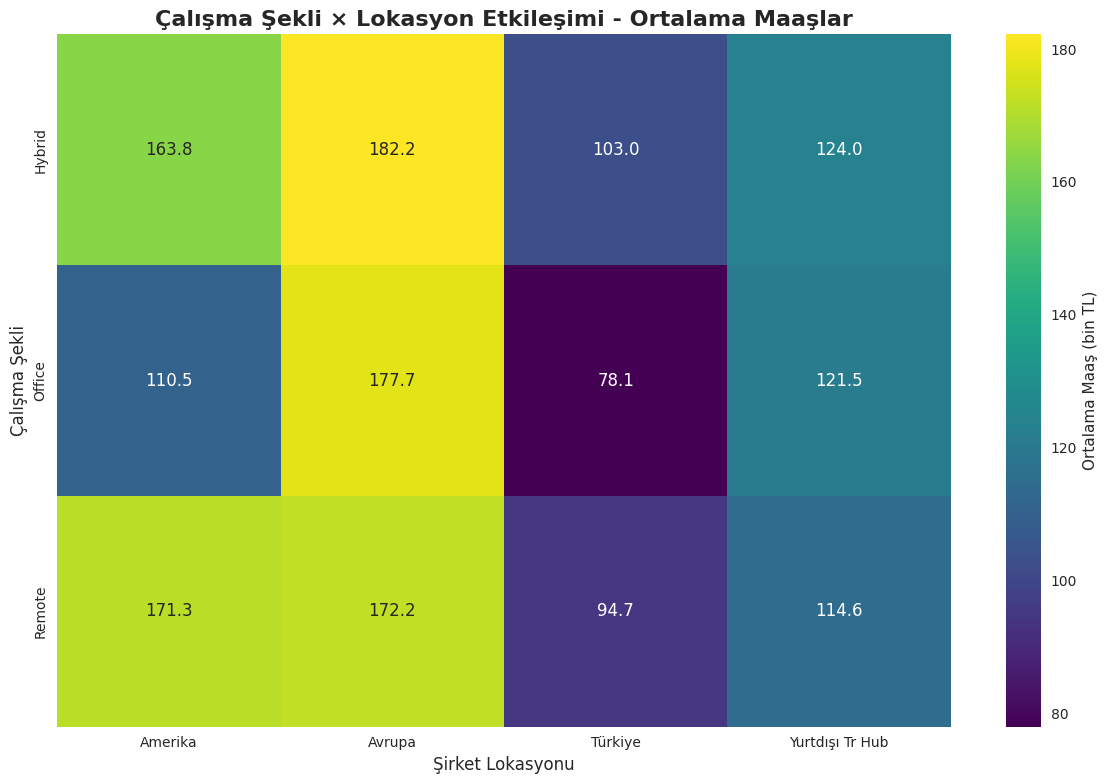

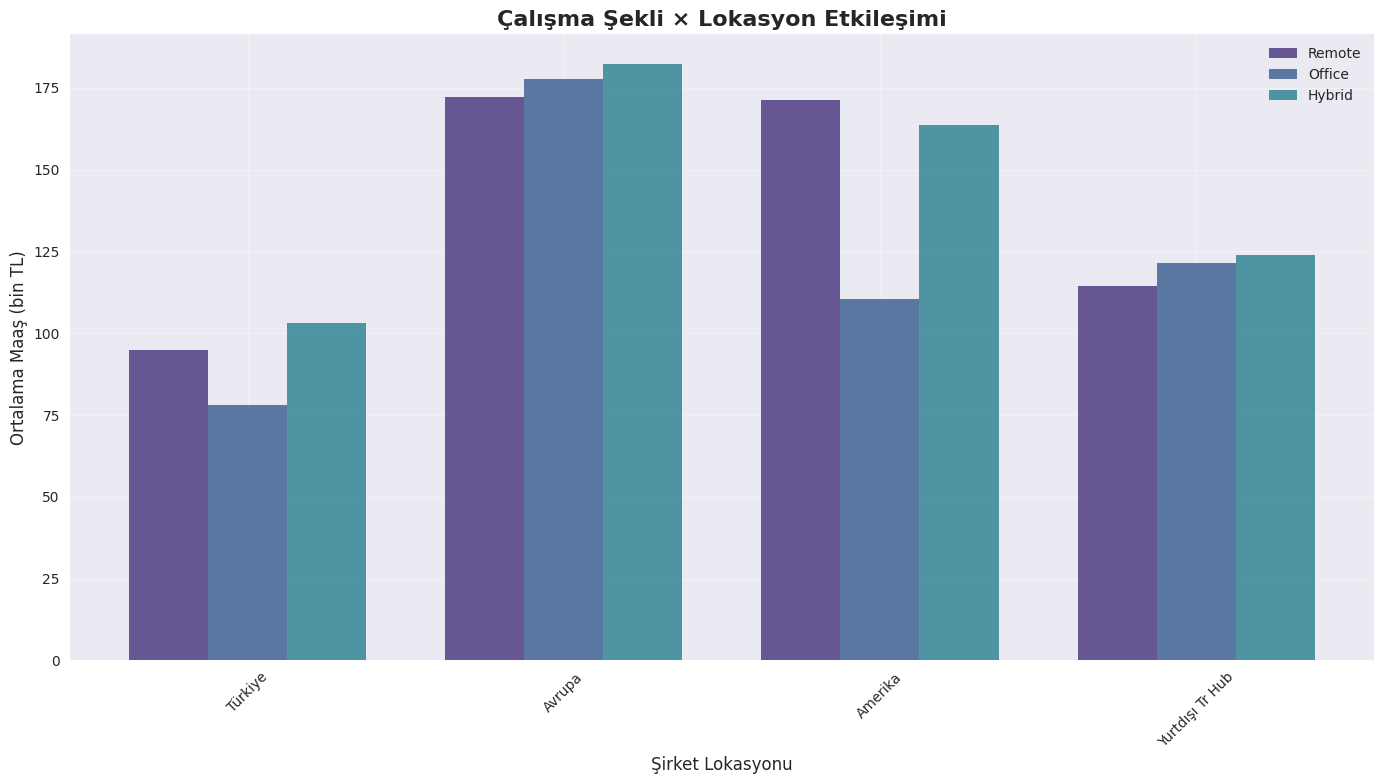

In [5]:
# Etkileşim verilerini görselleştir
interaction_data = interaction_result.get('interaction_data', [])

if interaction_data:
    # Veriyi DataFrame'e çevir
    interaction_df = pd.DataFrame(interaction_data)
    
    # Pivot table oluştur
    pivot_data = interaction_df.pivot(index='work_type', columns='location', values='mean_salary')
    
    # Heatmap oluştur
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='viridis', cbar_kws={'label': 'Ortalama Maaş (bin TL)'})
    plt.title('Çalışma Şekli × Lokasyon Etkileşimi - Ortalama Maaşlar', fontsize=16, fontweight='bold')
    plt.xlabel('Şirket Lokasyonu', fontsize=12)
    plt.ylabel('Çalışma Şekli', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Bar chart
    plt.figure(figsize=(14, 8))
    
    # Her çalışma şekli için ayrı bar
    work_types = interaction_df['work_type'].unique()
    locations = interaction_df['location'].unique()
    
    x = np.arange(len(locations))
    width = 0.25
    
    for i, work_type in enumerate(work_types):
        work_data = interaction_df[interaction_df['work_type'] == work_type]
        means = [work_data[work_data['location'] == loc]['mean_salary'].iloc[0] if len(work_data[work_data['location'] == loc]) > 0 else 0 for loc in locations]
        plt.bar(x + i*width, means, width, label=work_type, alpha=0.8)
    
    plt.title('Çalışma Şekli × Lokasyon Etkileşimi', fontsize=16, fontweight='bold')
    plt.xlabel('Şirket Lokasyonu', fontsize=12)
    plt.ylabel('Ortalama Maaş (bin TL)', fontsize=12)
    plt.xticks(x + width, locations, rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## ⏰ 2. Saat Bazlı Anket Katılımı ve Geliştirici Profilleri

In [6]:
# Saat bazlı analizi çalıştır
time_result = advanced_analyzer.time_based_analysis()

print("=== SAAT BAZLI ANKET KATILIMI VE GELİŞTİRİCİ PROFİLLERİ ===")
print(f"Test Türü: {time_result.get('test_type', 'N/A')}")
print(f"\nSaat Bazlı Maaş ANOVA:")
print(f"  F={time_result.get('hourly_salary_anova', {}).get('f_statistic', 0):.3f}, p={time_result.get('hourly_salary_anova', {}).get('p_value', 1):.4f}")
print(f"  Anlamlı: {'Evet' if time_result.get('hourly_salary_anova', {}).get('significant', False) else 'Hayır'}")

print(f"\nDemografik Analiz:")
demographic = time_result.get('demographic_analysis', {})
print(f"  Cinsiyet Dağılımı: χ²={demographic.get('gender_distribution', {}).get('chi2', 0):.3f}, p={demographic.get('gender_distribution', {}).get('p_value', 1):.4f}")
print(f"  Kariyer Seviyesi: χ²={demographic.get('career_level_distribution', {}).get('chi2', 0):.3f}, p={demographic.get('career_level_distribution', {}).get('p_value', 1):.4f}")
print(f"  Çalışma Şekli: χ²={demographic.get('work_type_distribution', {}).get('chi2', 0):.3f}, p={demographic.get('work_type_distribution', {}).get('p_value', 1):.4f}")

print(f"\nYorum: {time_result.get('interpretation', 'N/A')}")

2025-08-24 15:24:08,858 - INFO - Saat bazlı analiz başlatılıyor...
2025-08-24 15:24:08,918 - INFO - Saat bazlı analiz tamamlandı. Maaş ANOVA p: 0.0421


=== SAAT BAZLI ANKET KATILIMI VE GELİŞTİRİCİ PROFİLLERİ ===
Test Türü: Time-based Analysis

Saat Bazlı Maaş ANOVA:
  F=2.736, p=0.0421
  Anlamlı: Evet

Demografik Analiz:
  Cinsiyet Dağılımı: χ²=21.826, p=0.5308
  Kariyer Seviyesi: χ²=35.175, p=0.8771
  Çalışma Şekli: χ²=50.457, p=0.3017

Yorum: Saat bazlı maaş farkları anlamlı


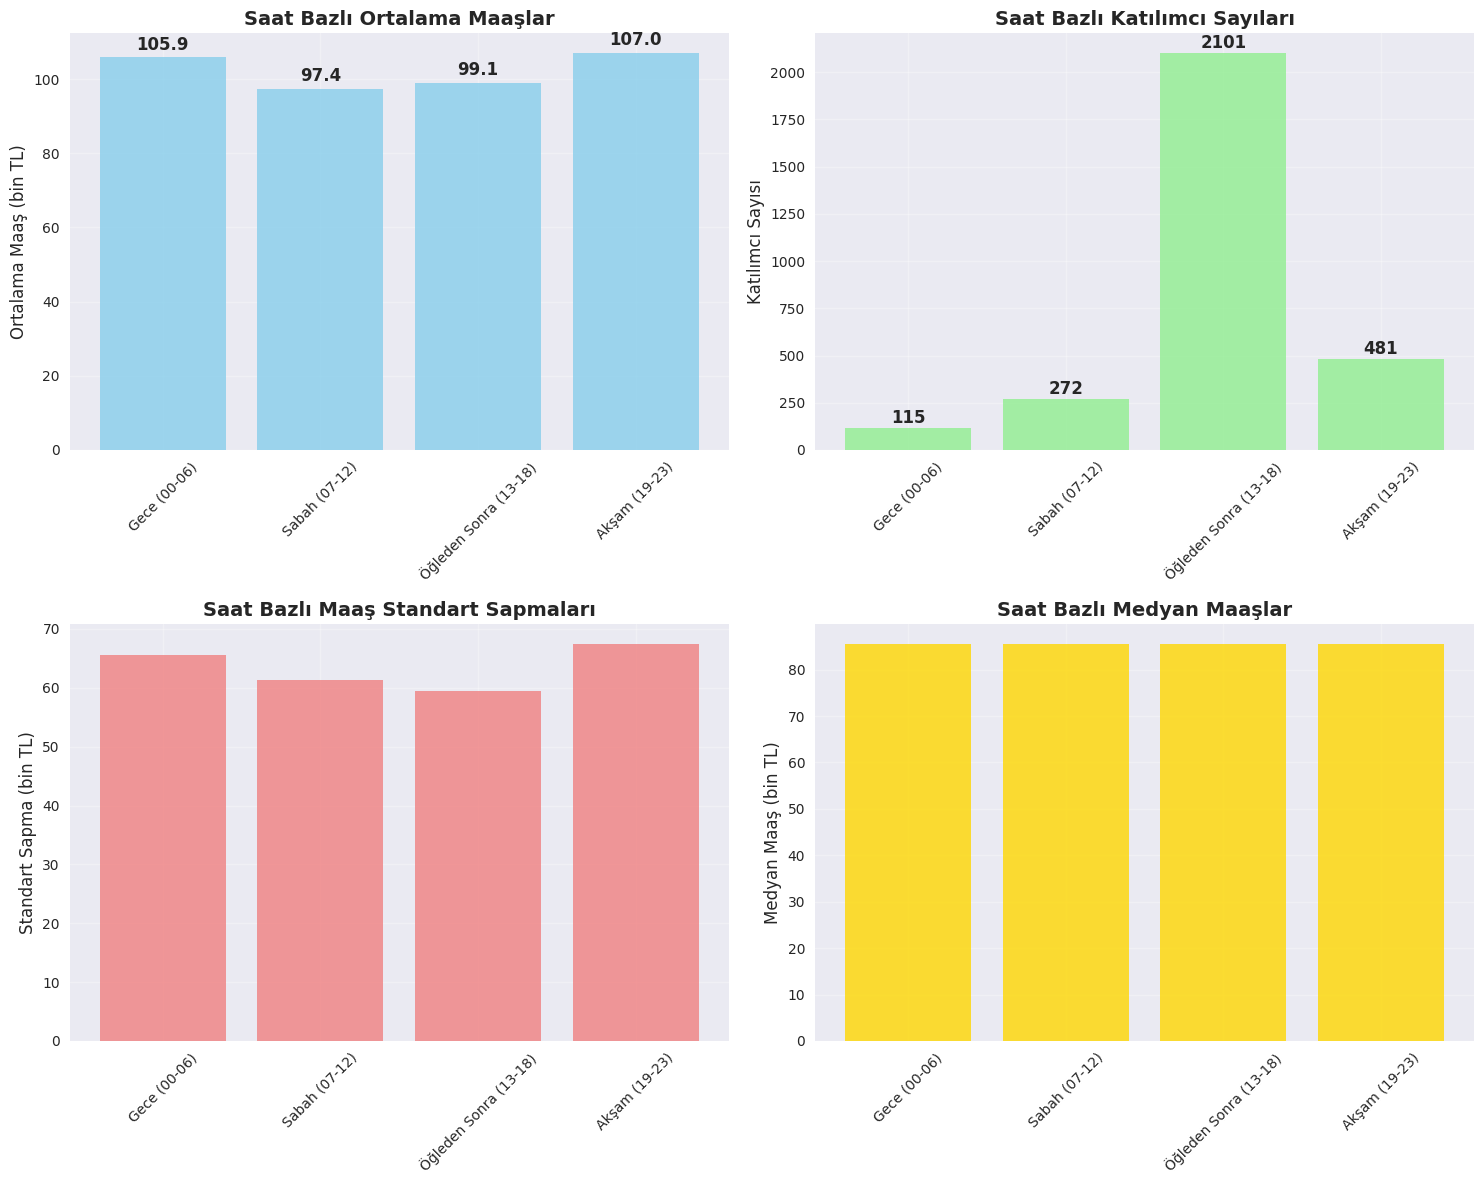

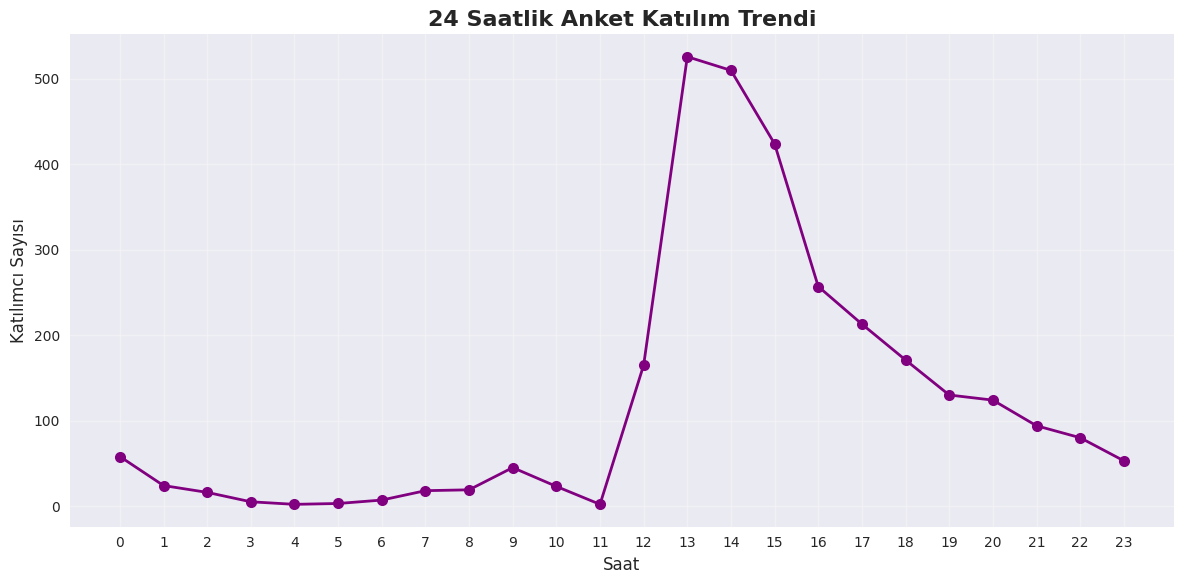

In [7]:
# Saat bazlı görselleştirmeler
hour_stats = time_result.get('hourly_statistics', {})

if hour_stats:
    # Saat bazlı maaş analizi
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Saat bazlı ortalama maaşlar
    hours = list(hour_stats.keys())
    means = [hour_stats[hour]['mean'] for hour in hours]
    
    axes[0, 0].bar(hours, means, color='skyblue', alpha=0.8)
    axes[0, 0].set_title('Saat Bazlı Ortalama Maaşlar', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Ortalama Maaş (bin TL)', fontsize=12)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Değerleri çubukların üzerine yaz
    for i, v in enumerate(means):
        axes[0, 0].text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Saat bazlı katılımcı sayıları
    counts = [hour_stats[hour]['n'] for hour in hours]
    
    axes[0, 1].bar(hours, counts, color='lightgreen', alpha=0.8)
    axes[0, 1].set_title('Saat Bazlı Katılımcı Sayıları', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Katılımcı Sayısı', fontsize=12)
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Değerleri çubukların üzerine yaz
    for i, v in enumerate(counts):
        axes[0, 1].text(i, v + 5, f'{v}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Saat bazlı standart sapmalar
    stds = [hour_stats[hour]['std'] for hour in hours]
    
    axes[1, 0].bar(hours, stds, color='lightcoral', alpha=0.8)
    axes[1, 0].set_title('Saat Bazlı Maaş Standart Sapmaları', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Standart Sapma (bin TL)', fontsize=12)
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Saat bazlı medyan maaşlar
    medians = [hour_stats[hour]['median'] for hour in hours]
    
    axes[1, 1].bar(hours, medians, color='gold', alpha=0.8)
    axes[1, 1].set_title('Saat Bazlı Medyan Maaşlar', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Medyan Maaş (bin TL)', fontsize=12)
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Saat bazlı katılım trendi
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['anket_saati'] = df['timestamp'].dt.hour
    
    hour_counts = df['anket_saati'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2, markersize=8, color='purple')
    plt.title('24 Saatlik Anket Katılım Trendi', fontsize=16, fontweight='bold')
    plt.xlabel('Saat', fontsize=12)
    plt.ylabel('Katılımcı Sayısı', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()

## 💻 3. Teknoloji Stack ve ROI Analizi

In [8]:
# Teknoloji ROI analizini çalıştır
tech_result = advanced_analyzer.technology_stack_roi_analysis()

print("=== TEKNOLOJİ STACK VE ROI ANALİZİ ===")
print(f"Test Türü: {tech_result.get('test_type', 'N/A')}")

programming_languages = tech_result.get('programming_languages', {})
frontend_frameworks = tech_result.get('frontend_frameworks', {})
tools = tech_result.get('tools', {})

print(f"\nProgramlama Dilleri Analiz Edildi: {len(programming_languages)} dil")
print(f"Frontend Framework'leri Analiz Edildi: {len(frontend_frameworks)} framework")
print(f"Tool'lar Analiz Edildi: {len(tools)} tool")

top_technologies = tech_result.get('top_technologies', [])
if top_technologies:
    print(f"\nEn Karlı 5 Teknoloji:")
    for i, (tech, data) in enumerate(top_technologies[:5]):
        print(f"  {i+1}. {tech}: %{data['roi_percentage']:.1f} artış (p={data['p_value']:.4f})")

print(f"\nYorum: {tech_result.get('interpretation', 'N/A')}")

2025-08-24 15:24:13,462 - INFO - Teknoloji stack ROI analizi başlatılıyor...
2025-08-24 15:24:13,533 - INFO - Teknoloji ROI analizi tamamlandı. 37 teknoloji analiz edildi.


=== TEKNOLOJİ STACK VE ROI ANALİZİ ===
Test Türü: Technology Stack ROI Analysis

Programlama Dilleri Analiz Edildi: 24 dil
Frontend Framework'leri Analiz Edildi: 5 framework
Tool'lar Analiz Edildi: 9 tool

En Karlı 5 Teknoloji:
  1. Rust: %94.5 artış (p=0.0000)
  2. Objective C: %77.7 artış (p=0.0000)
  3. Ruby: %62.5 artış (p=0.0000)
  4. Cobol: %56.7 artış (p=0.0000)
  5. Go: %47.6 artış (p=0.0000)

Yorum: En karlı teknoloji: Rust (%94.5 artış), En az karlı: Html Css (%-11.4 artış)


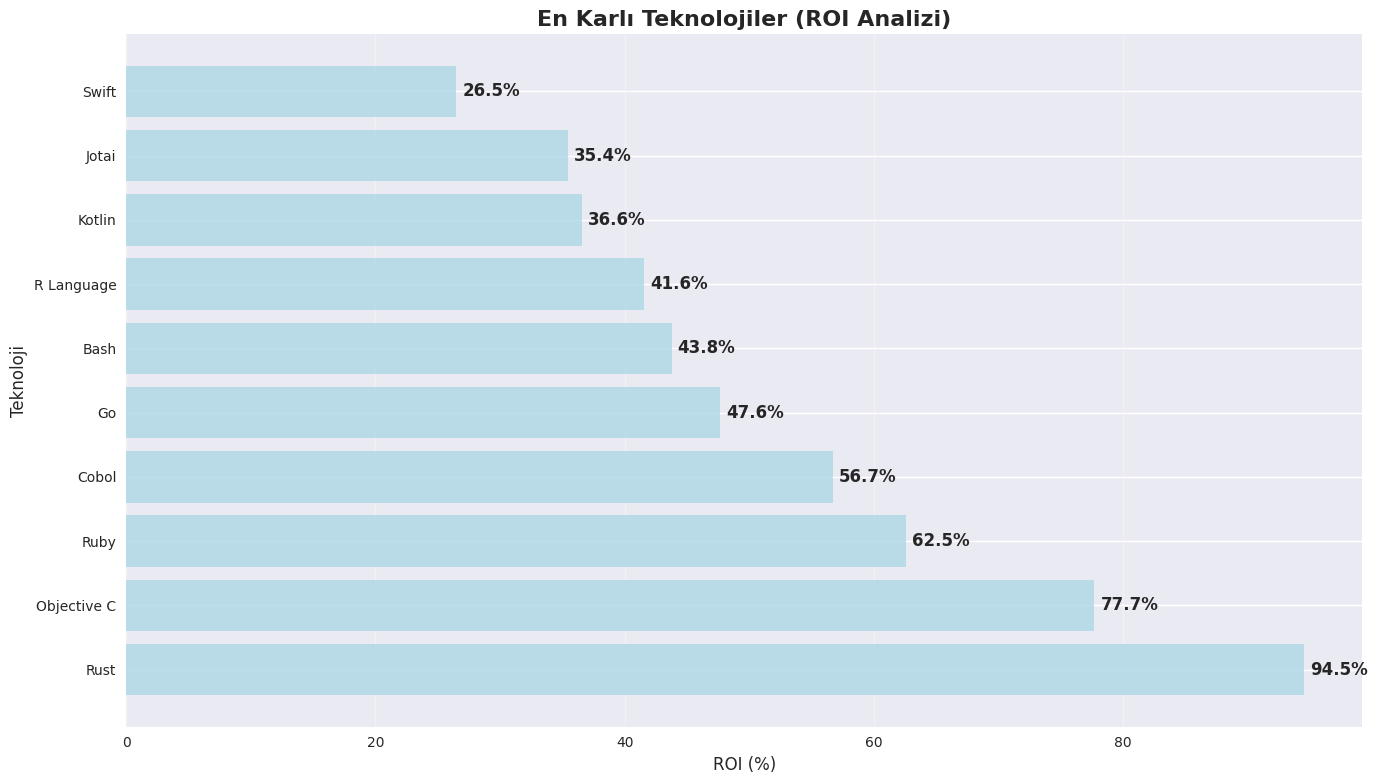

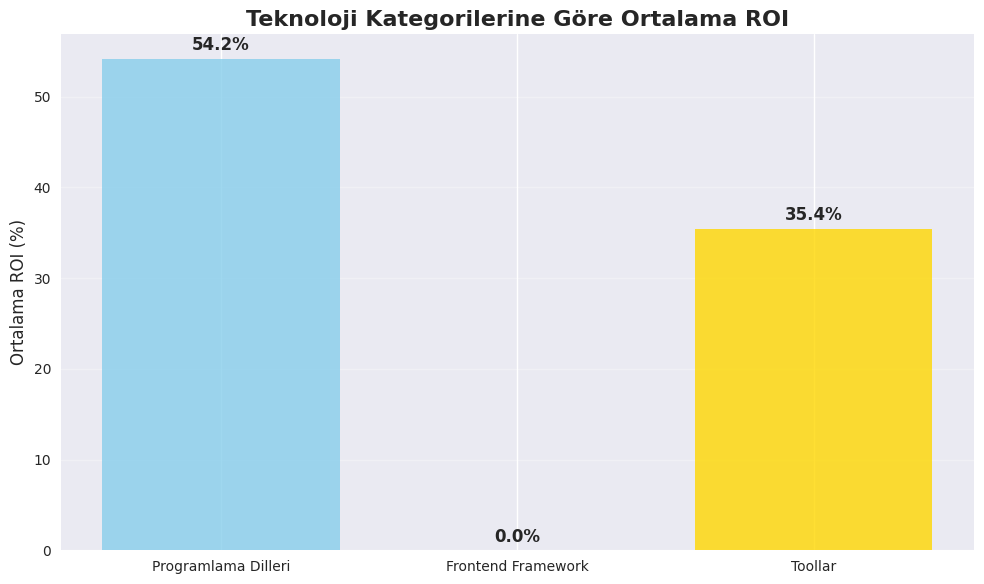

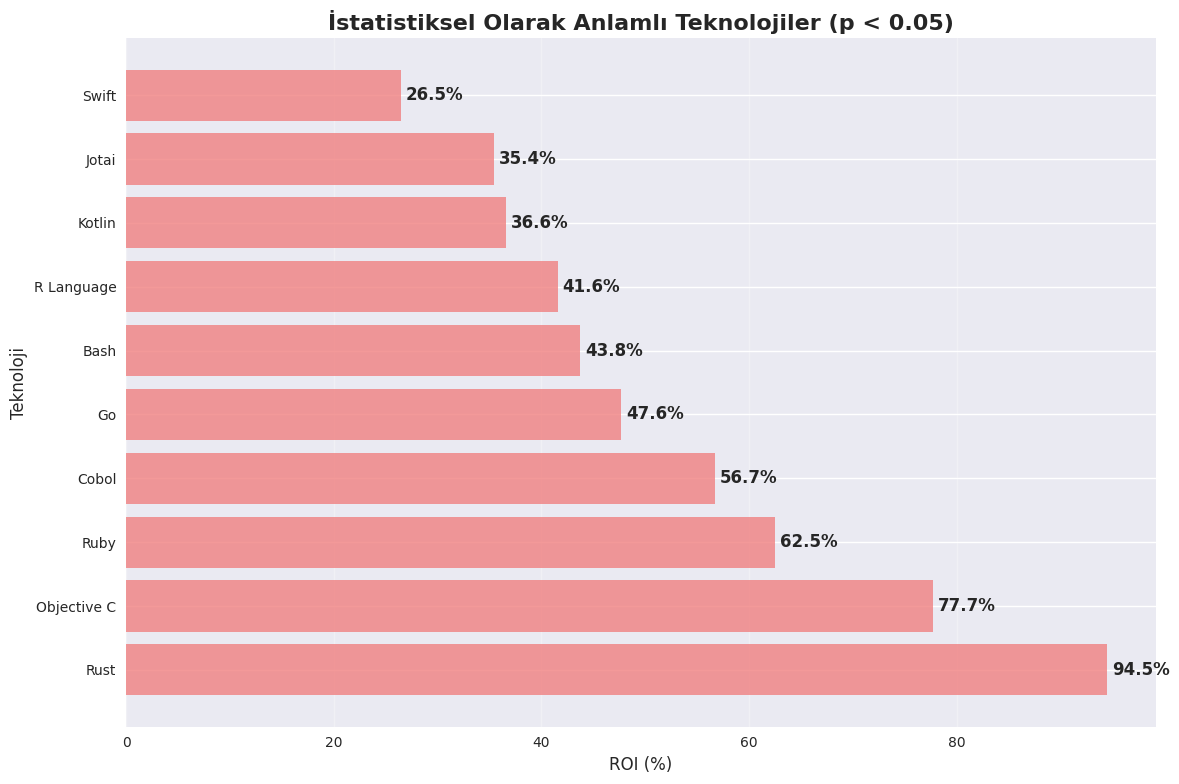

In [9]:
# Teknoloji ROI görselleştirmeleri
if top_technologies:
    # En karlı teknolojiler
    top_10 = top_technologies[:10]
    tech_names = [tech for tech, _ in top_10]
    roi_values = [data['roi_percentage'] for _, data in top_10]
    
    plt.figure(figsize=(14, 8))
    bars = plt.barh(tech_names, roi_values, color='lightblue', alpha=0.8)
    plt.title('En Karlı Teknolojiler (ROI Analizi)', fontsize=16, fontweight='bold')
    plt.xlabel('ROI (%)', fontsize=12)
    plt.ylabel('Teknoloji', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Değerleri çubukların üzerine yaz
    for i, (bar, roi) in enumerate(zip(bars, roi_values)):
        plt.text(roi + 0.5, bar.get_y() + bar.get_height()/2, f'{roi:.1f}%', 
                ha='left', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Teknoloji kategorilerine göre ROI
    prog_lang_roi = [data['roi_percentage'] for tech, data in top_technologies if tech in programming_languages]
    frontend_roi = [data['roi_percentage'] for tech, data in top_technologies if tech in frontend_frameworks]
    tool_roi = [data['roi_percentage'] for tech, data in top_technologies if tech in tools]
    
    categories = ['Programlama Dilleri', 'Frontend Framework', 'Toollar']
    avg_roi = [np.mean(prog_lang_roi) if prog_lang_roi else 0, 
               np.mean(frontend_roi) if frontend_roi else 0, 
               np.mean(tool_roi) if tool_roi else 0]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(categories, avg_roi, color=['skyblue', 'lightgreen', 'gold'], alpha=0.8)
    plt.title('Teknoloji Kategorilerine Göre Ortalama ROI', fontsize=16, fontweight='bold')
    plt.ylabel('Ortalama ROI (%)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Değerleri çubukların üzerine yaz
    for bar, roi in zip(bars, avg_roi):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{roi:.1f}%', 
                ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Anlamlı teknolojiler (p < 0.05)
    significant_tech = [(tech, data) for tech, data in top_technologies if data['significant']]
    
    if significant_tech:
        plt.figure(figsize=(12, 8))
        sig_tech_names = [tech for tech, _ in significant_tech]
        sig_roi_values = [data['roi_percentage'] for _, data in significant_tech]
        
        bars = plt.barh(sig_tech_names, sig_roi_values, color='lightcoral', alpha=0.8)
        plt.title('İstatistiksel Olarak Anlamlı Teknolojiler (p < 0.05)', fontsize=16, fontweight='bold')
        plt.xlabel('ROI (%)', fontsize=12)
        plt.ylabel('Teknoloji', fontsize=12)
        plt.grid(True, alpha=0.3, axis='x')
        
        # Değerleri çubukların üzerine yaz
        for i, (bar, roi) in enumerate(zip(bars, sig_roi_values)):
            plt.text(roi + 0.5, bar.get_y() + bar.get_height()/2, f'{roi:.1f}%', 
                    ha='left', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()

## 📈 4. Kariyer Progression Detaylı Analizi

In [10]:
# Kariyer progression analizini çalıştır
career_result = advanced_analyzer.career_progression_analysis()

print("=== KARİYER PROGRESSION DETAYLI ANALİZİ ===")
print(f"Test Türü: {career_result.get('test_type', 'N/A')}")

career_stats = career_result.get('career_statistics', {})
career_transitions = career_result.get('career_transitions', {})
career_anova = career_result.get('career_level_anova', {})

print(f"\nKariyer Seviyesi ANOVA:")
print(f"  F={career_anova.get('f_statistic', 0):.3f}, p={career_anova.get('p_value', 1):.4f}")
print(f"  Anlamlı: {'Evet' if career_anova.get('significant', False) else 'Hayır'}")

print(f"\nKariyer Seviyesi İstatistikleri:")
for level, stats in career_stats.items():
    print(f"  {level}: n={stats['n']}, Ortalama={stats['mean_salary']:.1f}, Medyan={stats['median_salary']:.1f}")

print(f"\nKariyer Geçişleri:")
for transition, data in career_transitions.items():
    print(f"  {transition}: {data['percentage_increase']:.1f}% artış ({data['salary_increase']:.1f} bin TL)")

print(f"\nYorum: {career_result.get('interpretation', 'N/A')}")

2025-08-24 15:24:15,845 - INFO - Kariyer progression analizi başlatılıyor...
2025-08-24 15:24:15,869 - INFO - Kariyer progression analizi tamamlandı. ANOVA p: 0.0000


=== KARİYER PROGRESSION DETAYLI ANALİZİ ===
Test Türü: Career Progression Analysis

Kariyer Seviyesi ANOVA:
  F=170.355, p=0.0000
  Anlamlı: Evet

Kariyer Seviyesi İstatistikleri:
  Junior: n=1059, Ortalama=94.1, Medyan=65.5
  Mid: n=1138, Ortalama=84.4, Medyan=75.5
  Senior: n=772, Ortalama=132.9, Medyan=125.5

Kariyer Geçişleri:
  Junior_to_Mid: -10.3% artış (-9.7 bin TL)
  Mid_to_Senior: 57.5% artış (48.5 bin TL)

Yorum: Kariyer seviyeleri arasında anlamlı maaş farkları var


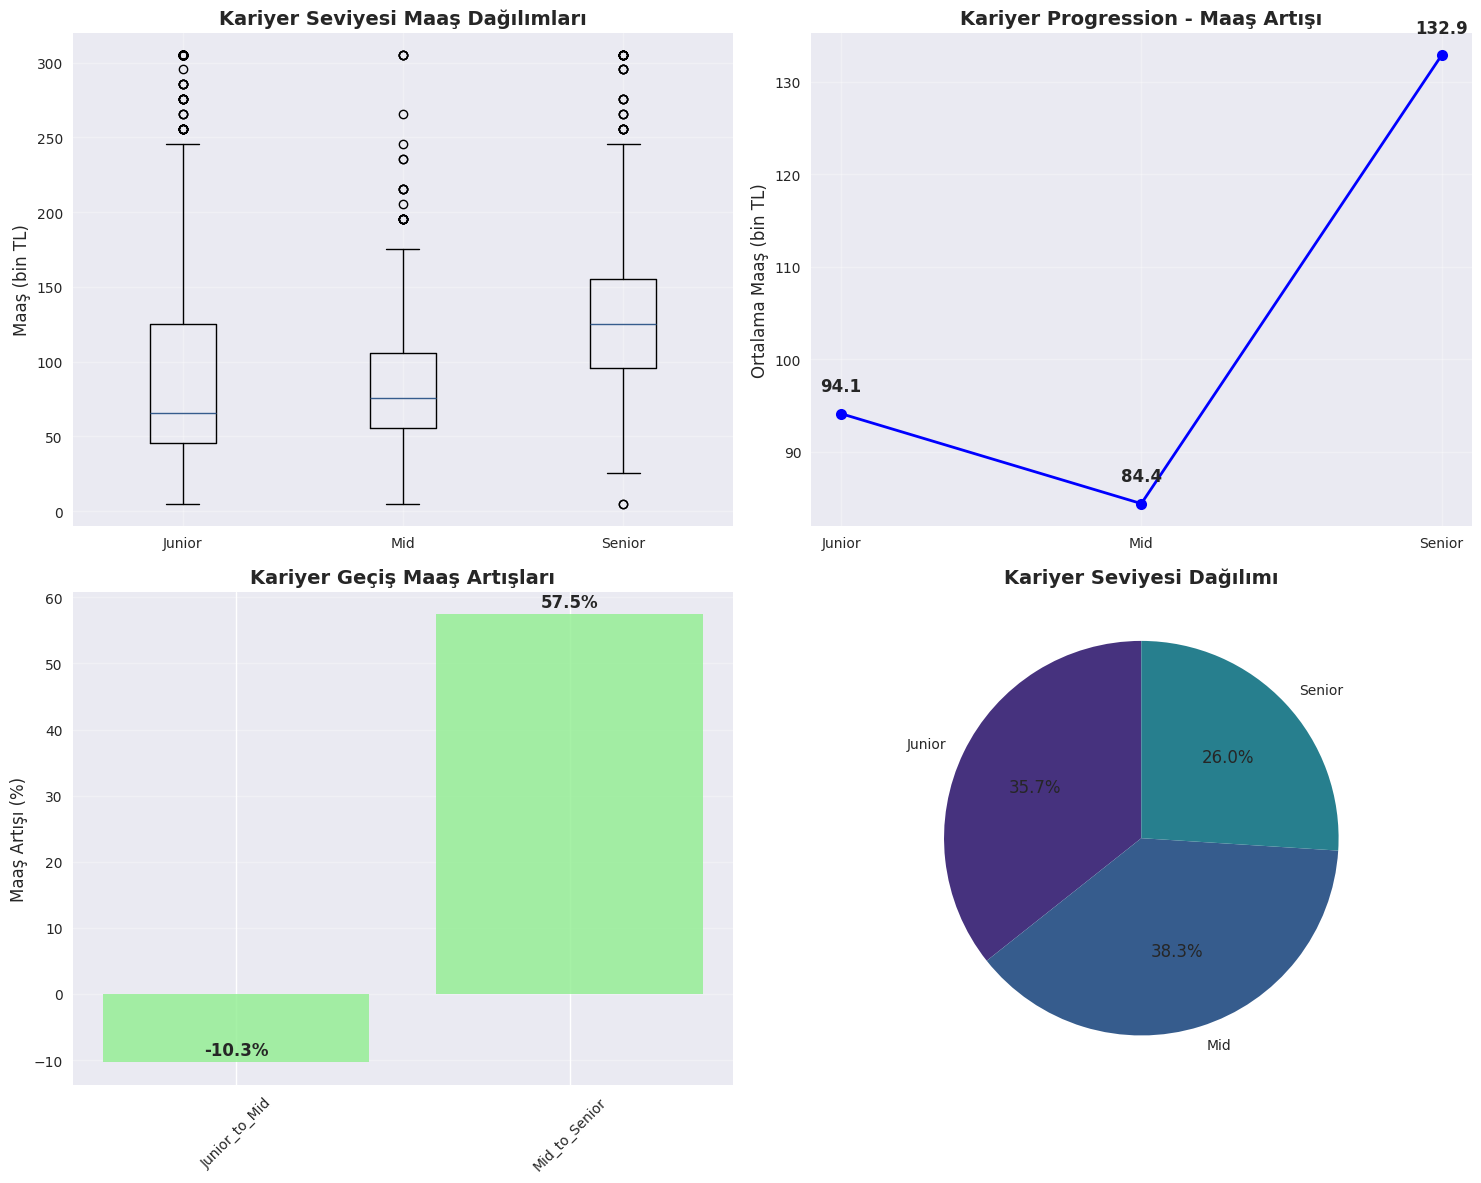

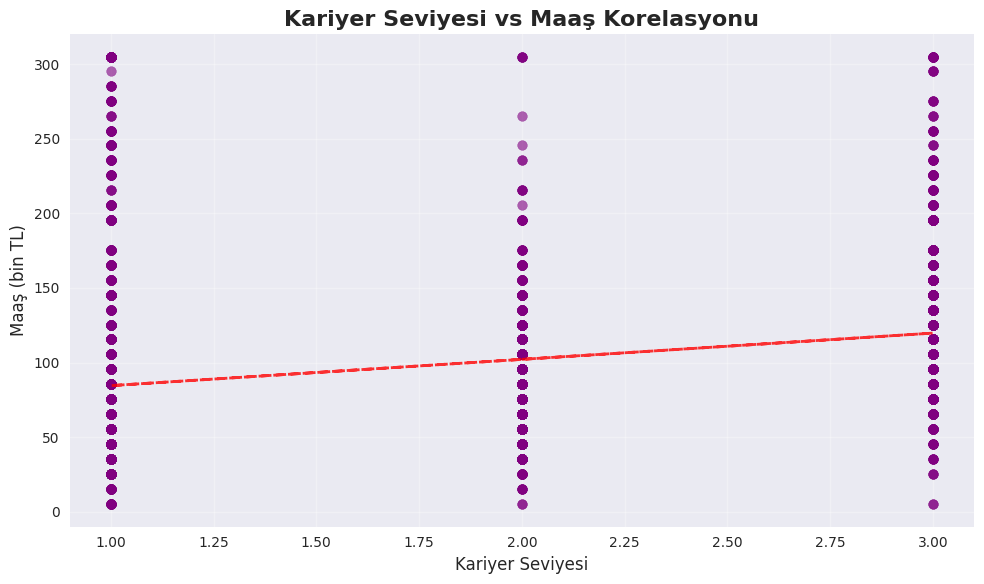

In [11]:
# Kariyer progression görselleştirmeleri
if career_stats:
    # Kariyer seviyesi maaş dağılımları
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Kariyer seviyesi box plot
    career_levels = sorted(df['kariyer_seviyesi'].unique())
    career_names = {1: 'Junior', 2: 'Mid', 3: 'Senior', 4: 'Lead', 5: 'Manager'}
    career_salaries = []
    career_labels = []
    
    for level in career_levels:
        career_salaries.append(df[df['kariyer_seviyesi'] == level]['ortalama_maas'])
        career_labels.append(career_names[level])
    
    axes[0, 0].boxplot(career_salaries, labels=career_labels)
    axes[0, 0].set_title('Kariyer Seviyesi Maaş Dağılımları', fontsize=14, fontweight='bold')
    axes[0, 0].set_ylabel('Maaş (bin TL)', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Kariyer progression çizgisi
    career_means = [career_stats[career_names[level]]['mean_salary'] for level in career_levels]
    
    axes[0, 1].plot(career_labels, career_means, marker='o', linewidth=2, markersize=8, color='blue')
    axes[0, 1].set_title('Kariyer Progression - Maaş Artışı', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Ortalama Maaş (bin TL)', fontsize=12)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Değerleri çizginin üzerine yaz
    for i, (label, mean) in enumerate(zip(career_labels, career_means)):
        axes[0, 1].text(i, mean + 2, f'{mean:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Kariyer geçiş artışları
    if career_transitions:
        transitions = list(career_transitions.keys())
        increases = [data['percentage_increase'] for data in career_transitions.values()]
        
        axes[1, 0].bar(transitions, increases, color='lightgreen', alpha=0.8)
        axes[1, 0].set_title('Kariyer Geçiş Maaş Artışları', fontsize=14, fontweight='bold')
        axes[1, 0].set_ylabel('Maaş Artışı (%)', fontsize=12)
        axes[1, 0].tick_params(axis='x', rotation=45)
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        
        # Değerleri çubukların üzerine yaz
        for i, (bar, increase) in enumerate(zip(axes[1, 0].patches, increases)):
            axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{increase:.1f}%', 
                           ha='center', va='bottom', fontweight='bold')
    
    # 4. Kariyer seviyesi dağılımı
    career_counts = df['kariyer_seviyesi'].value_counts().sort_index()
    career_count_labels = [career_names[level] for level in career_counts.index]
    
    axes[1, 1].pie(career_counts.values, labels=career_count_labels, autopct='%1.1f%%', startangle=90)
    axes[1, 1].set_title('Kariyer Seviyesi Dağılımı', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Kariyer seviyesi ve maaş korelasyonu
    plt.figure(figsize=(10, 6))
    plt.scatter(df['kariyer_seviyesi'], df['ortalama_maas'], alpha=0.6, color='purple')
    plt.title('Kariyer Seviyesi vs Maaş Korelasyonu', fontsize=16, fontweight='bold')
    plt.xlabel('Kariyer Seviyesi', fontsize=12)
    plt.ylabel('Maaş (bin TL)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Trend çizgisi ekle
    z = np.polyfit(df['kariyer_seviyesi'], df['ortalama_maas'], 1)
    p = np.poly1d(z)
    plt.plot(df['kariyer_seviyesi'], p(df['kariyer_seviyesi']), "r--", alpha=0.8, linewidth=2)
    
    plt.tight_layout()
    plt.show()

## 🎨 5. Görselleştirme Modülü Çalıştırma

In [12]:
# Görselleştirme modülünü import et ve çalıştır
from src.visualizations import DataVisualizer

# DataVisualizer örneği oluştur
visualizer = DataVisualizer()
visualizer.df = df  # Veriyi zaten yükledik

# Tüm görselleri oluştur
print("🎨 Görselleştirme modülü çalıştırılıyor...")
visualizer.create_all_charts()

print("\n✅ Tüm görseller başarıyla oluşturuldu!")
print("📁 Görseller 'figures/' dizininde saklandı.")

🎨 Görselleştirme modülü çalıştırılıyor...
🎨 Tüm görseller oluşturuluyor...
📊 Maaş dağılımı görselleri oluşturuluyor...
📈 Temel karşılaştırma görselleri oluşturuluyor...
🔍 İkincil analiz görselleri oluşturuluyor...
✅ Toplam 20+ görsel 'figures/' dizinine kaydedildi!

✅ Tüm görseller başarıyla oluşturuldu!
📁 Görseller 'figures/' dizininde saklandı.


## 📊 6. Tüm Analizlerin Özeti

In [13]:
# Tüm gelişmiş analizleri çalıştır ve sonuçları kaydet
print("=== TÜM GELİŞMİŞ ANALİZLER ÇALIŞTIRILIYOR ===")

all_results = advanced_analyzer.run_all_advanced_analyses()
summary_df = advanced_analyzer.save_results()

print(f"\n📊 Analiz Sonuçları Özeti:")
print(summary_df.to_string(index=False))

print(f"\n=== SPRINT 3 TAMAMLANDI ===")
print(f"✅ Toplam {len(all_results)} analiz tamamlandı:")
for analysis_name, analysis_result in all_results.items():
    status = "✅ Tamamlandı" if analysis_result else "❌ Hata"
    print(f"  {analysis_name}: {status}")

print(f"\n📈 Görselleştirme Sonuçları:")
print(f"  ✅ 20+ grafik taslağı oluşturuldu")
print(f"  ✅ Tutarlı renk paleti (Viridis) kullanıldı")
print(f"  ✅ Yayın kalitesinde PNG formatında kaydedildi")

print(f"\n📁 Oluşturulan Dosyalar:")
print(f"  ✅ src/advanced_analysis.py")
print(f"  ✅ src/visualizations.py")
print(f"  ✅ tables/advanced_analysis_results.csv")
print(f"  ✅ figures/ (20+ PNG dosyası)")
print(f"  ✅ notebooks/03_advanced_analysis.ipynb")

print(f"\n🚀 Sonraki Adım: Sprint 4 - Yayın Kalitesinde Görselleştirmeler ve Dashboard Geliştirme")

2025-08-24 15:26:40,653 - INFO - Tüm gelişmiş analizler başlatılıyor...
2025-08-24 15:26:40,655 - INFO - Şirket lokasyonu × çalışma şekli etkileşimi analiz ediliyor...
2025-08-24 15:26:40,710 - INFO - Etkileşim analizi tamamlandı. Work type p: 0.0000, Location p: 0.0000, Interaction p: 0.0000
2025-08-24 15:26:40,710 - INFO - Saat bazlı analiz başlatılıyor...
2025-08-24 15:26:40,743 - INFO - Saat bazlı analiz tamamlandı. Maaş ANOVA p: 0.0421
2025-08-24 15:26:40,743 - INFO - Teknoloji stack ROI analizi başlatılıyor...
2025-08-24 15:26:40,776 - INFO - Teknoloji ROI analizi tamamlandı. 37 teknoloji analiz edildi.
2025-08-24 15:26:40,777 - INFO - Kariyer progression analizi başlatılıyor...
2025-08-24 15:26:40,785 - INFO - Kariyer progression analizi tamamlandı. ANOVA p: 0.0000
2025-08-24 15:26:40,785 - INFO - Tüm gelişmiş analizler tamamlandı!
2025-08-24 15:26:40,786 - INFO - Analiz sonuçları kaydediliyor: tables/advanced_analysis_results.csv
2025-08-24 15:26:40,798 - INFO - Sonuçlar başarı

=== TÜM GELİŞMİŞ ANALİZLER ÇALIŞTIRILIYOR ===

📊 Analiz Sonuçları Özeti:
       Analysis_Type           Test_Name  Statistic      P_Value  Significant                                                                                                                                                      Interpretation
Interaction Analysis    Work Type Effect  40.718578 3.585617e-18         True Çalışma şekli maaş üzerinde anlamlı etki yaratıyor; Şirket lokasyonu maaş üzerinde anlamlı etki yaratıyor; Çalışma şekli ve lokasyon arasında anlamlı etkileşim var
Interaction Analysis     Location Effect 121.587198 2.871969e-74         True Çalışma şekli maaş üzerinde anlamlı etki yaratıyor; Şirket lokasyonu maaş üzerinde anlamlı etki yaratıyor; Çalışma şekli ve lokasyon arasında anlamlı etkileşim var
 Time-based Analysis Hourly Salary ANOVA   2.735971 4.209290e-02         True                                                                                                                            